### Importing Required Modules

In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, confusion_matrix

import joblib


### Data Understanding

In [54]:
df = pd.read_csv("bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [55]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [57]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [58]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

1. There is class Imbalance

In [59]:
duplicates = []
def check_duplicates(data):
   
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('The Dataset has No Duplicates')
    else:
        duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
        print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')
check_duplicates(df)

The Dataset has No Duplicates


### EDA

#### Outliers

In [60]:
# dividing into numerical and categorical columns
numerical_columns = df[["age", "balance", "duration", "campaign"]]
categorical_columns =df.select_dtypes(exclude = "number")

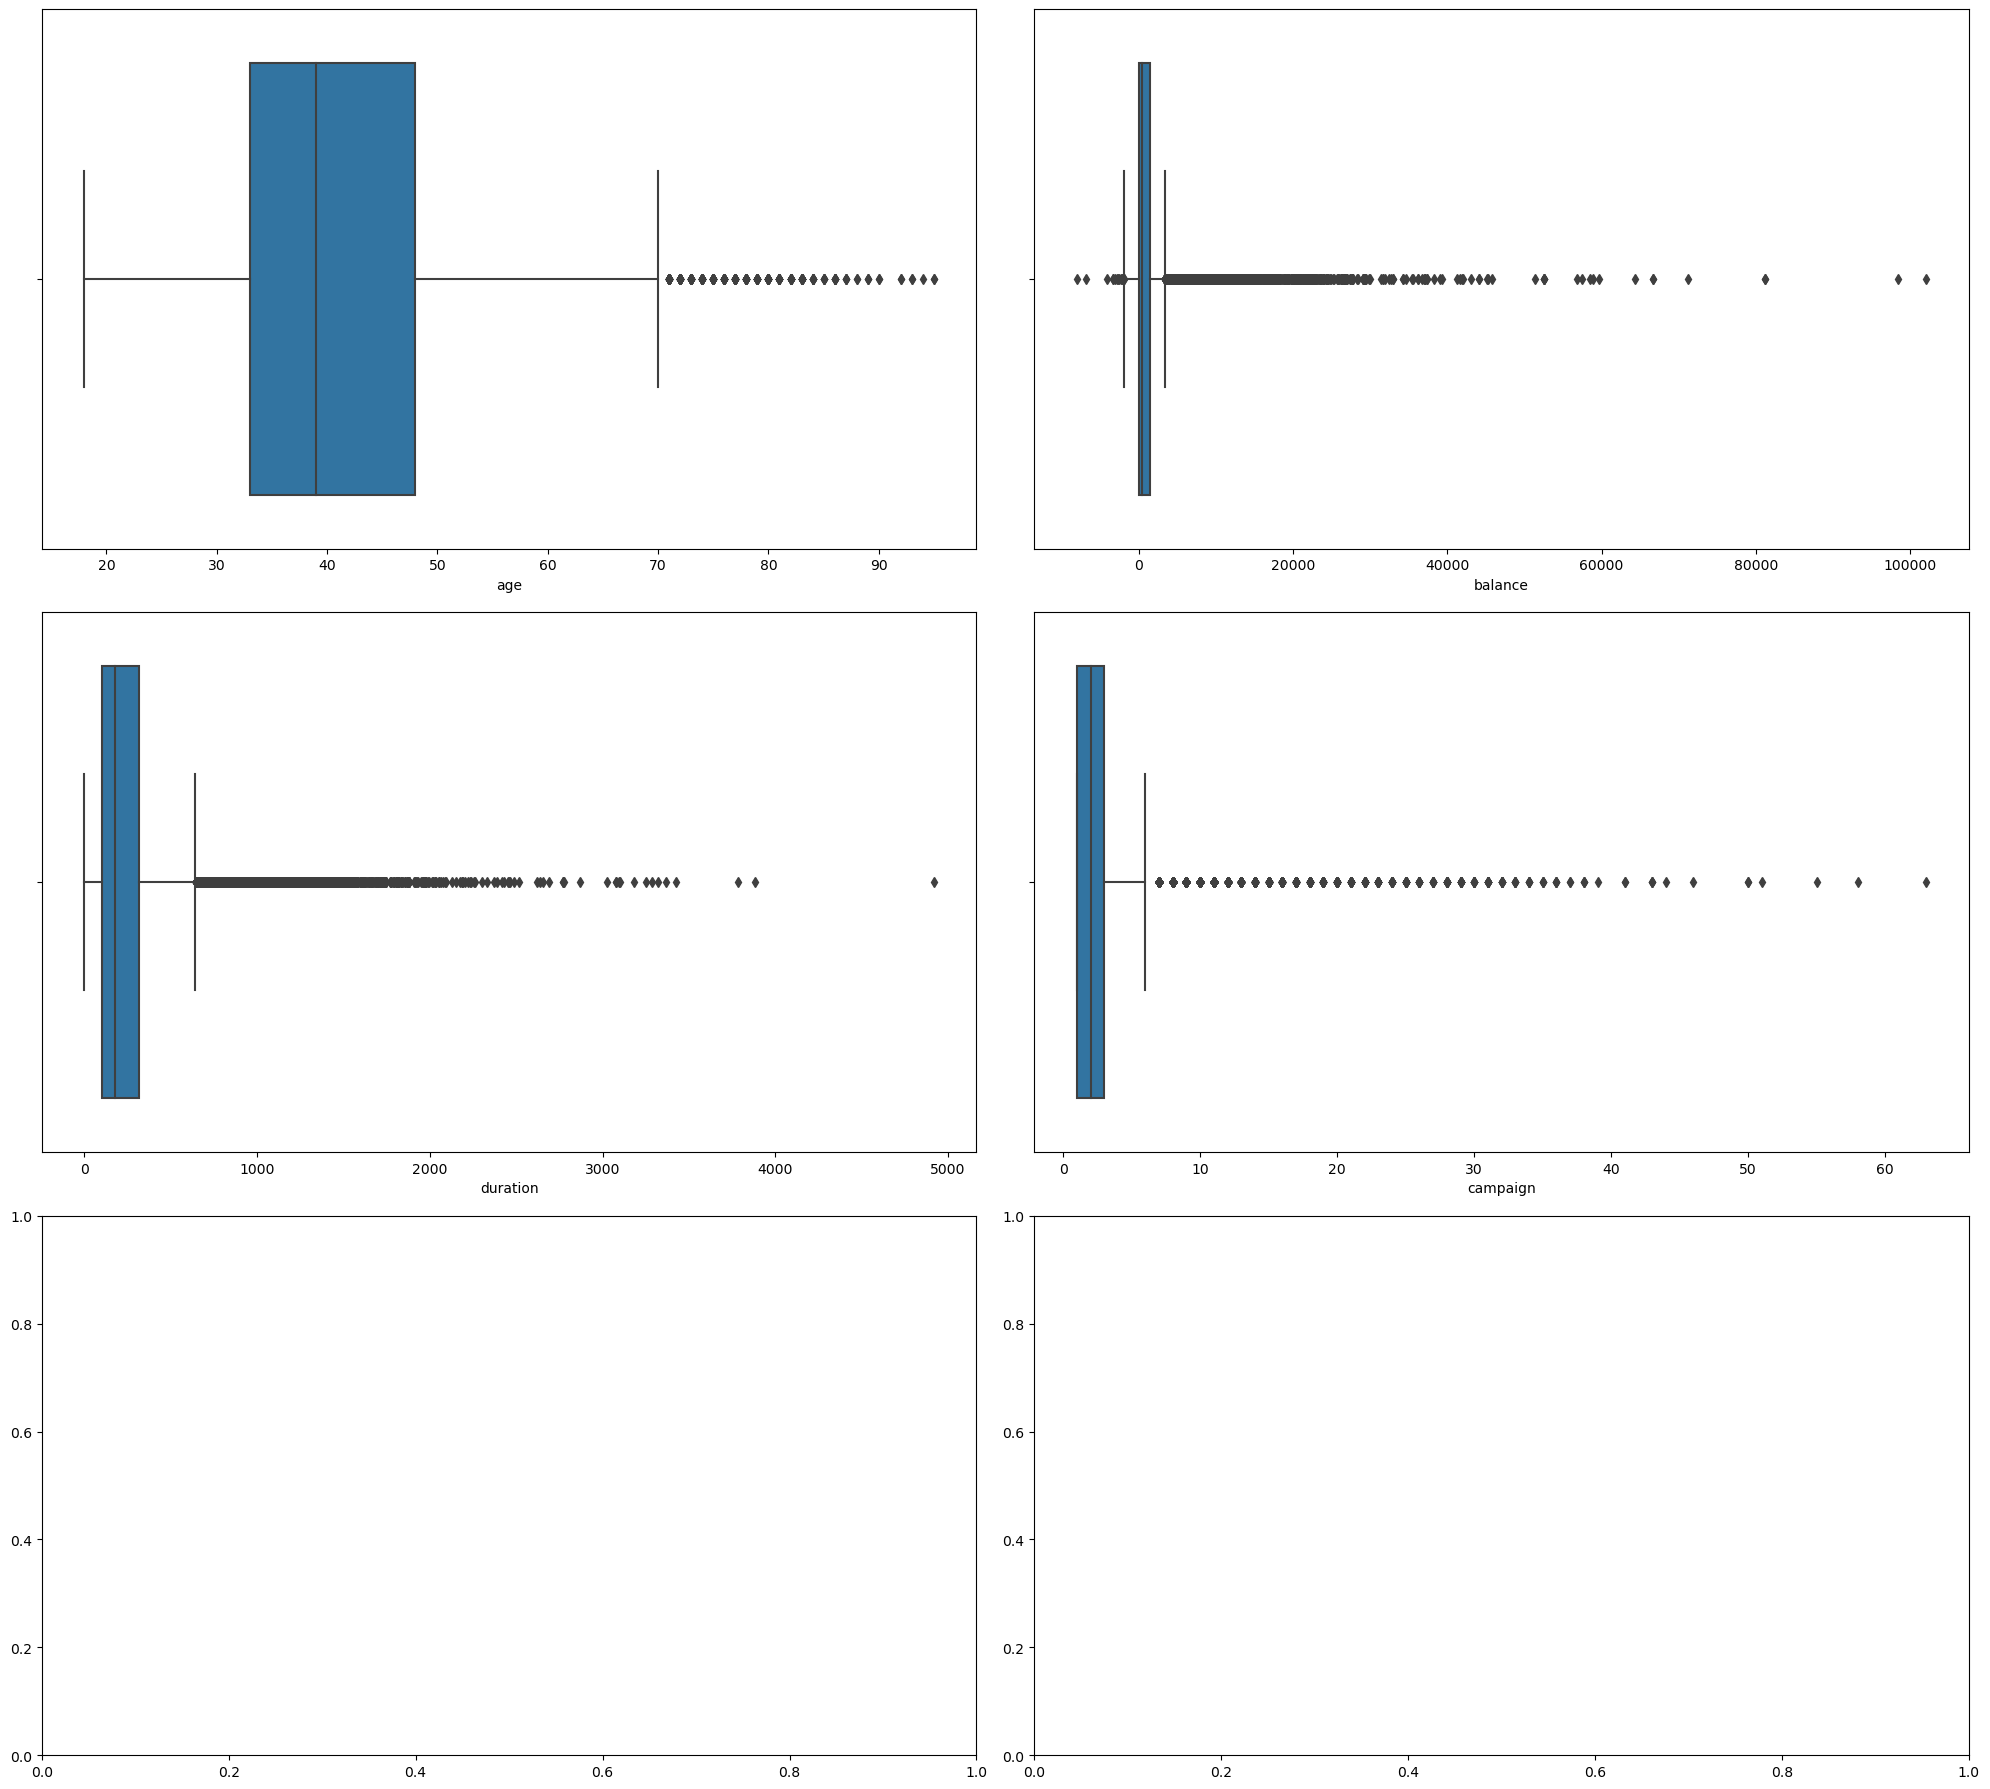

In [61]:
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
    axes = axes.flatten()  # Convert axes array to 1D

    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
       
        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
       # print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.tight_layout()
    plt.show()
check_outliers(df, numerical_columns)

1. We have to convert duration column from seconds to days


C:\Users\USER\AppData\Local\Temp\ipykernel_3168\871369445.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_columns[col], ax = ax[i], bins = 'auto')
C:\Users\USER\AppData\Local\Temp\ipykernel_3168\871369445.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_columns[col], a

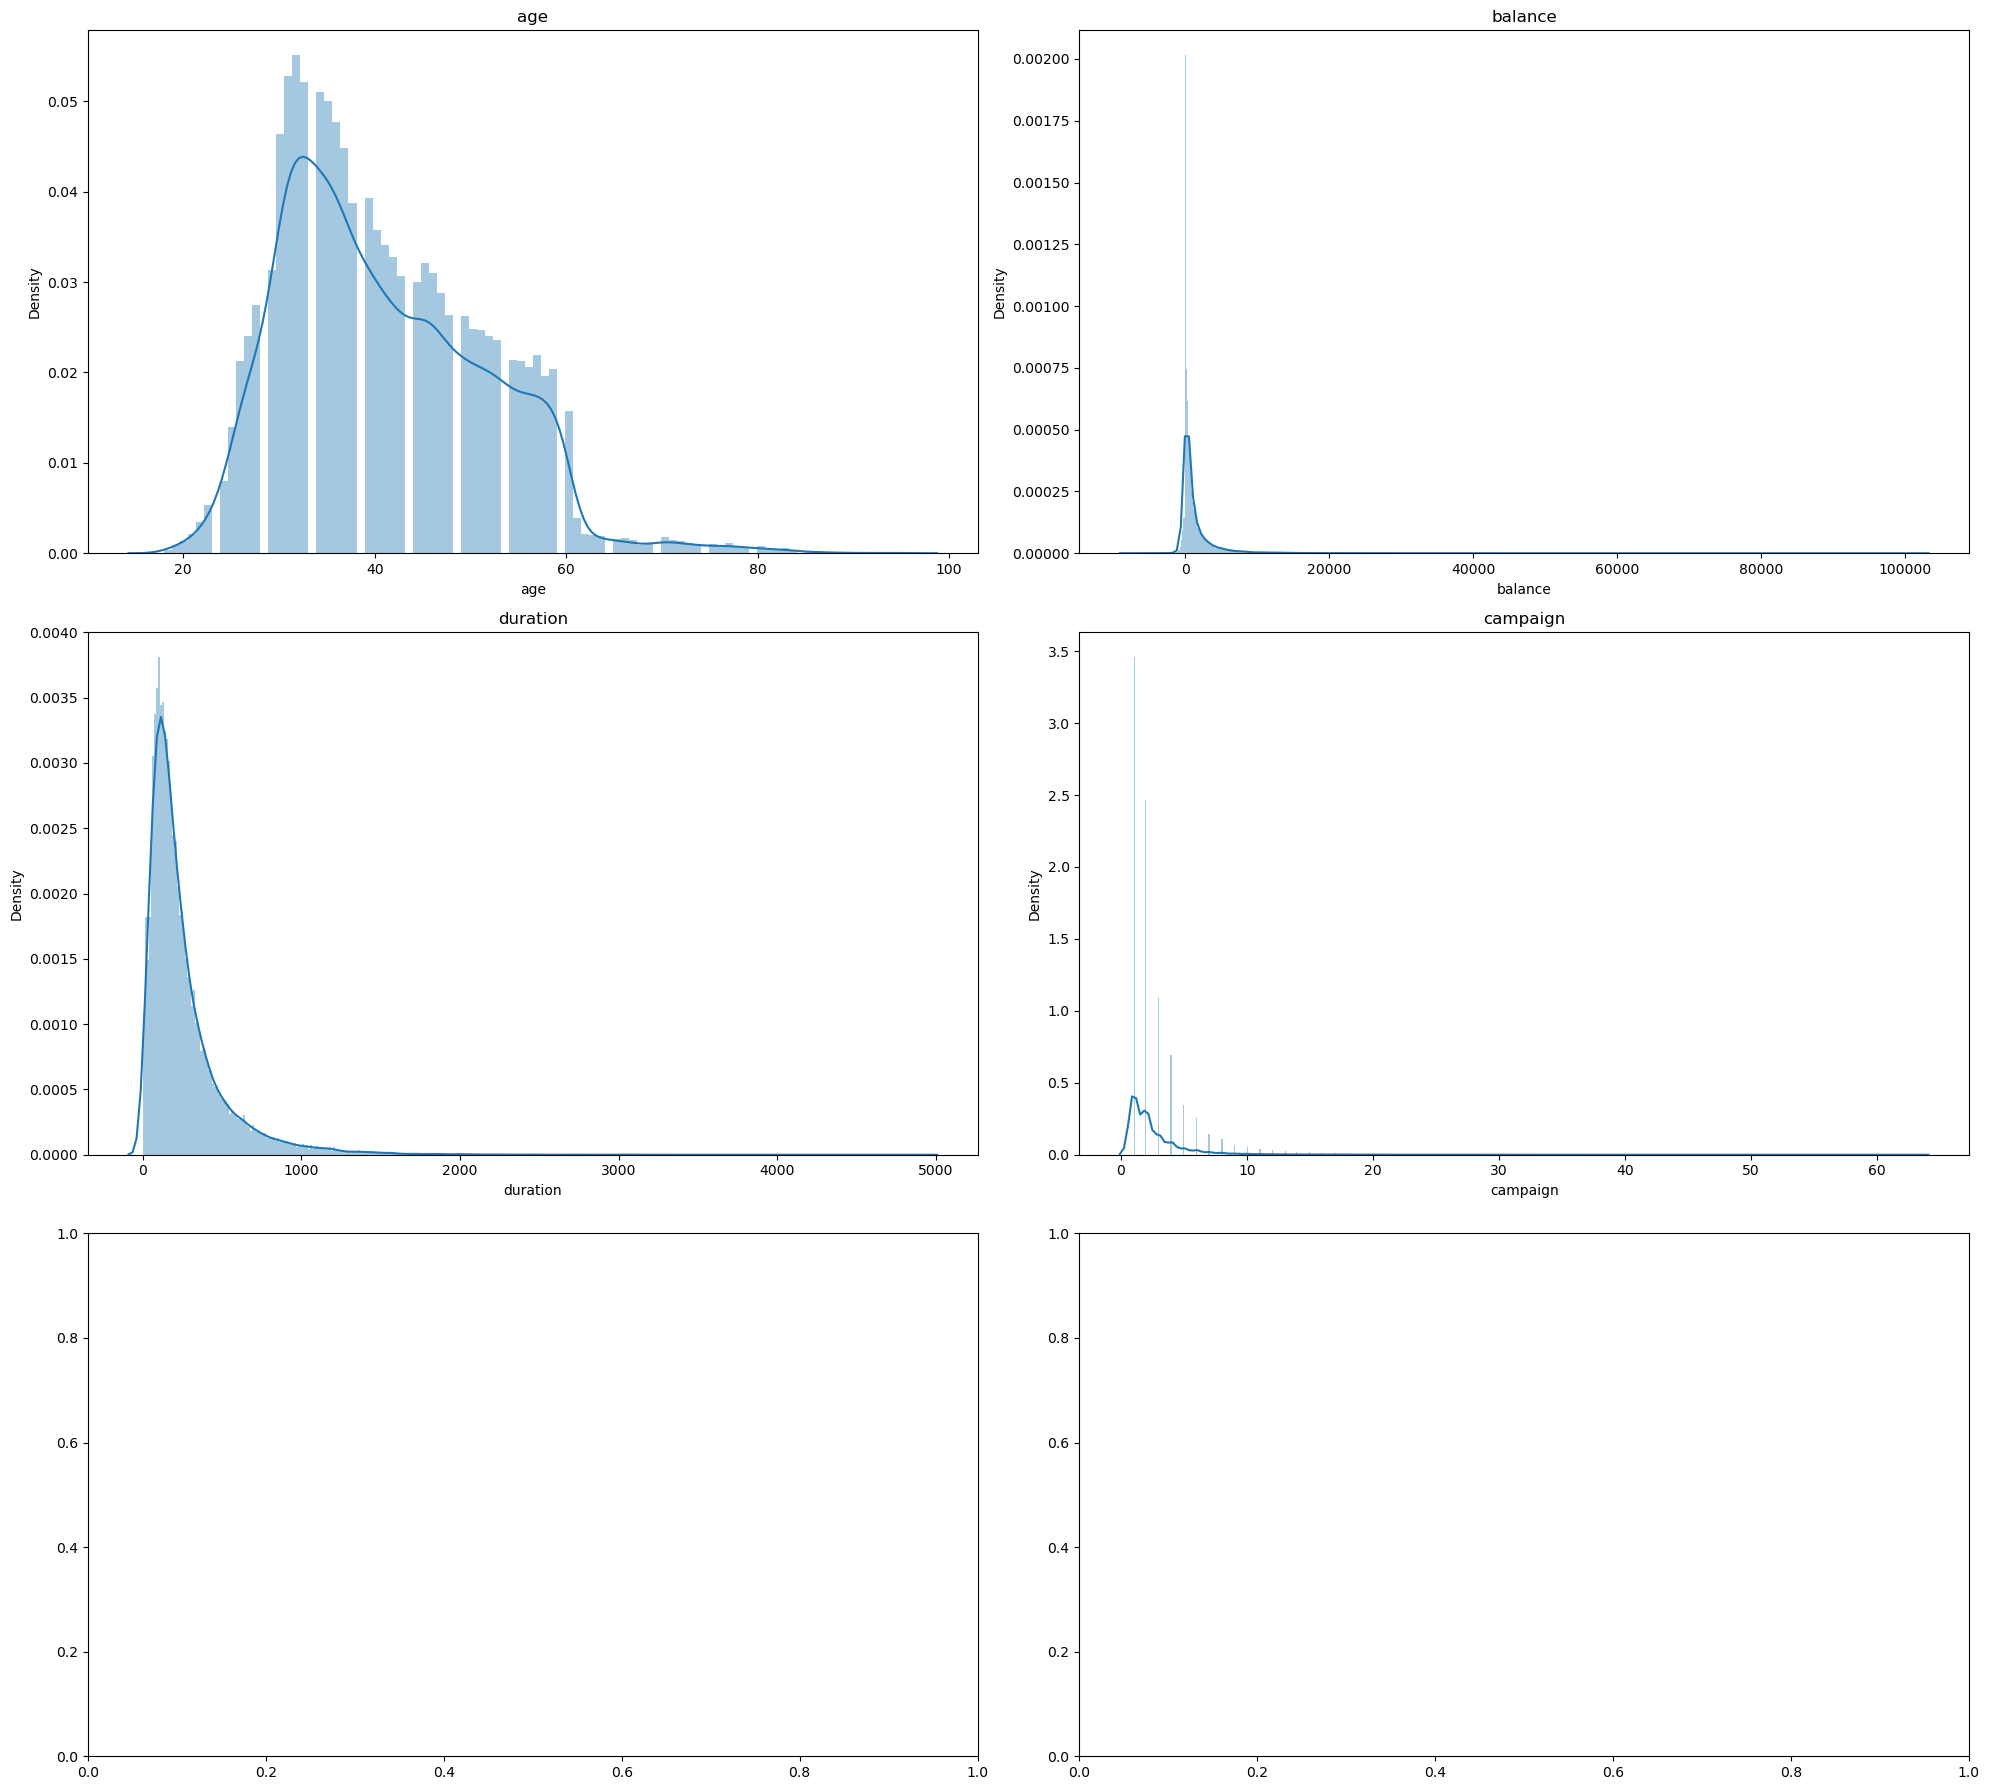

In [62]:
"""Visualizing numerical  columns"""
#create a figure and set subplots
fig, axes = plt.subplots(3,2, figsize = (20,18))
#iterate all the axes
ax = axes.flatten()

for i, col in enumerate(numerical_columns.columns):
    #plot an histogram for each column
    sns.distplot(numerical_columns[col], ax = ax[i], bins = 'auto')
    ax[i].set_title(col)
    
    
#adjust  padding
fig.tight_layout()
#display the plot
plt.show();

#### Columns relation to y

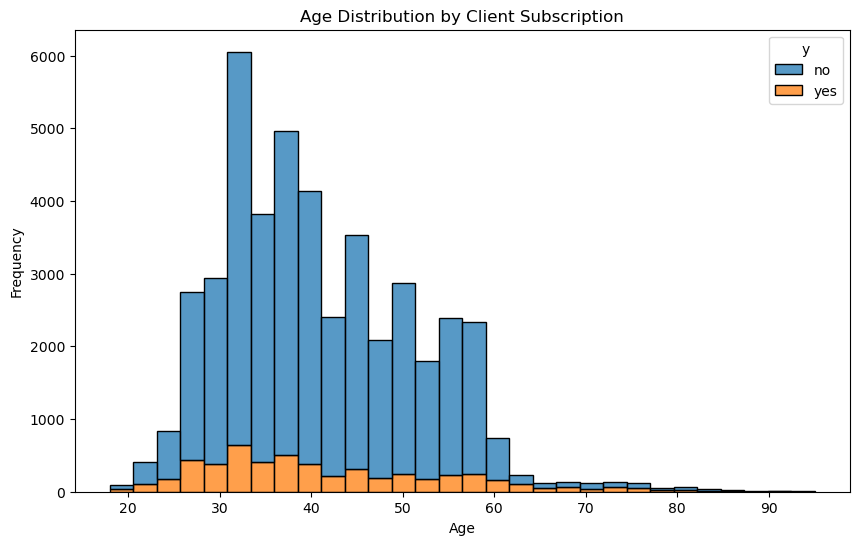

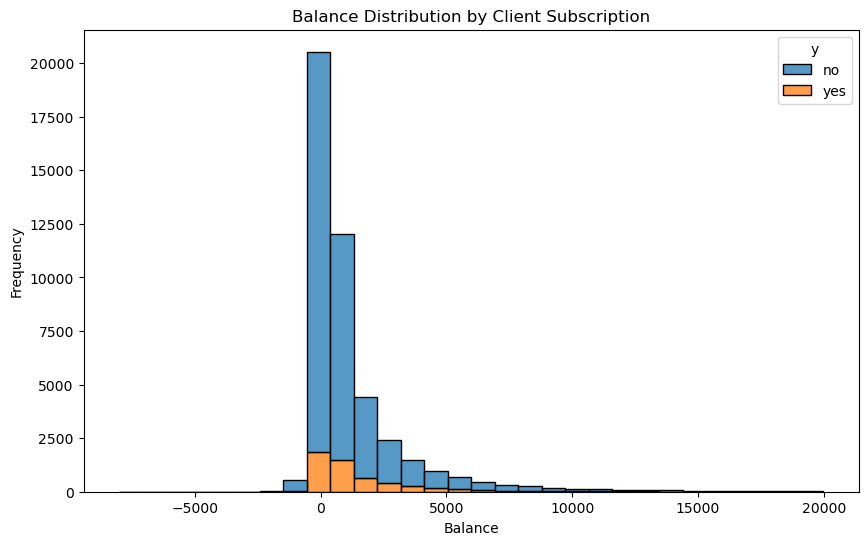

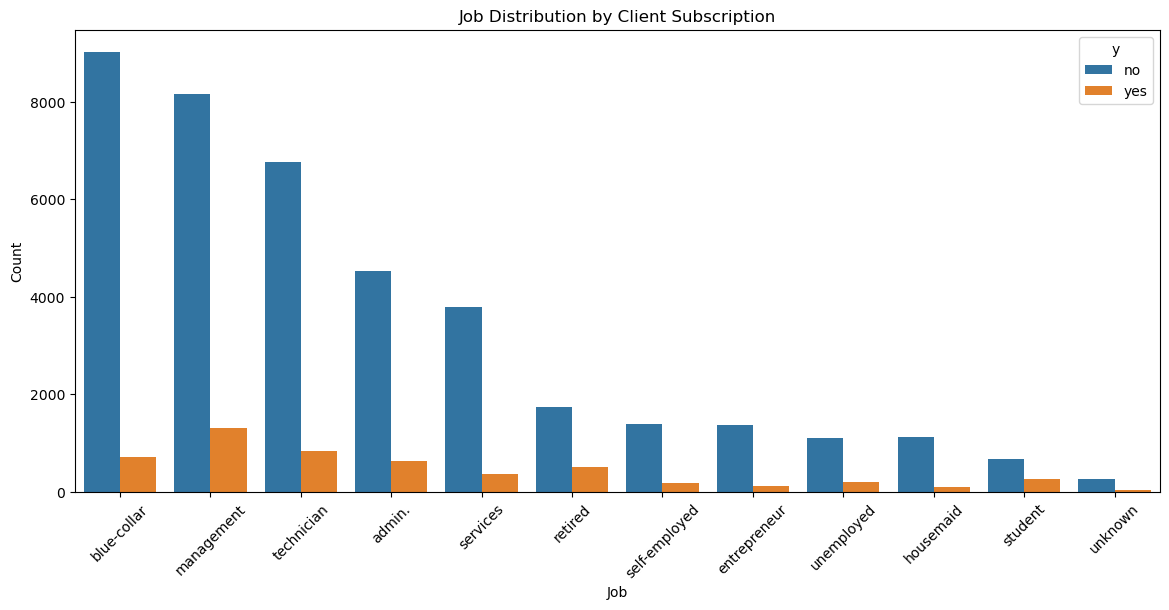

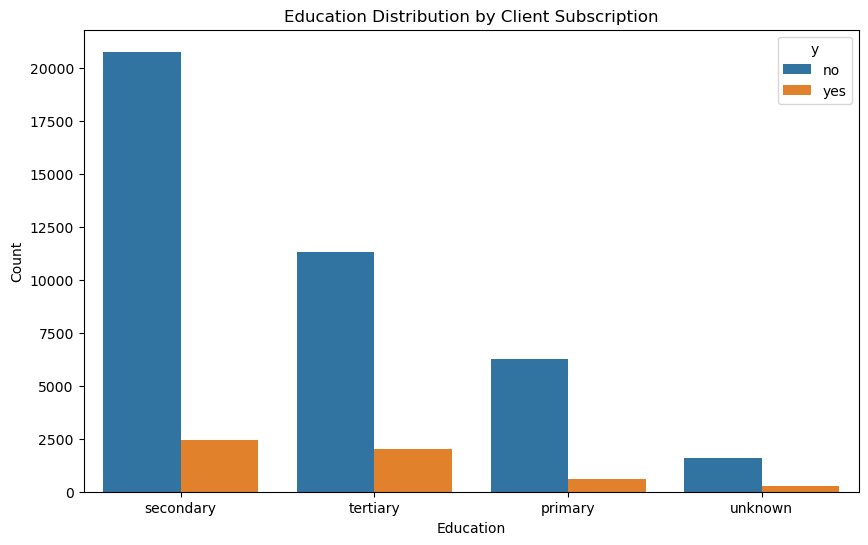

In [63]:
def plot_distributions(df):
    # Age distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='age', hue='y', multiple='stack', bins=30)
    plt.title('Age Distribution by Client Subscription')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

    # Balance distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df[df['balance'] < 20000], x='balance', hue='y', multiple='stack', bins=30)
    plt.title('Balance Distribution by Client Subscription')
    plt.xlabel('Balance')
    plt.ylabel('Frequency')
    plt.show()

    # Job distribution
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x='job', hue='y', order = df['job'].value_counts().index)
    plt.title('Job Distribution by Client Subscription')
    plt.xlabel('Job')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Education distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='education', hue='y', order = df['education'].value_counts().index)
    plt.title('Education Distribution by Client Subscription')
    plt.xlabel('Education')
    plt.ylabel('Count')
    plt.show()

# Call the plotting function
plot_distributions(df)


#### Data Preprocessing and Feature Engineering

##### Converting duration column in (seconds) to days

In [64]:
df['duration'] = df['duration'] / (24 * 60 * 60)
# Display the updated DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,0.003021,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,0.001748,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,0.000880,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,0.001065,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,0.002292,1,-1,0,unknown,no


##### Encoding y column

In [65]:
#df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
le_y = LabelEncoder()
df['y'] = le_y.fit_transform(df['y'])
# Display the updated DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,0.003021,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,0.001748,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,0.000880,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,0.001065,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,0.002292,1,-1,0,unknown,0


##### dropping unwanted columns

In [66]:
unwanted_columns = ["pdays", "previous", "poutcome"]
df.drop(unwanted_columns, axis=1, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,0.003021,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,0.001748,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,0.000880,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,0.001065,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,0.002292,1,0


##### Encoding Categorical columns

In [67]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'y':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

#### Model Building

In [68]:
X = df.drop("y", axis=1)
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


##### Logistic Regression

In [69]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\Users\USER\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
y_pred = logreg.predict(X_test)
report =classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7993
           1       0.00      0.00      0.00      1050

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043



##### Random Forest

In [71]:
rf = RandomForestClassifier()
#hyper parameter tuning
param_grid = {
    "n_estimators" : [10, 40, 50, 100],
    "max_depth" : [2,4,6,8,10,50],
    "min_samples_leaf" : [1,2,3],
    "min_samples_split" : [2,3,4,5,6,7,8]
}

In [72]:
#grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 504 candidates, totalling 1512 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [10, 40, 50, 100]},
             verbose=2)

In [73]:
#best parameters
best_params = grid_search.best_params_
print("best parameters found: ", best_params)

best parameters found:  {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50}


In [74]:
#best model
best_rf = grid_search.best_estimator_

In [75]:
# from sklearn import tree
# tree_to_visualize = best_rf.estimators_[0]

# # Convert the Index to a list for feature_names
# feature_names_list = df.columns[:-1].tolist()

# # Visualize the decision tree
# plt.figure(figsize=(40, 40))
# tree.plot_tree(tree_to_visualize, feature_names=feature_names_list, class_names=['No', 'Yes'], filled=True, rounded=True)
# plt.show()

In [76]:
#predictions 
predictions = best_rf.predict(X_test)

In [77]:
# Classifier report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7993
           1       0.58      0.34      0.43      1050

    accuracy                           0.89      9043
   macro avg       0.75      0.66      0.69      9043
weighted avg       0.88      0.89      0.88      9043



<Axes: >

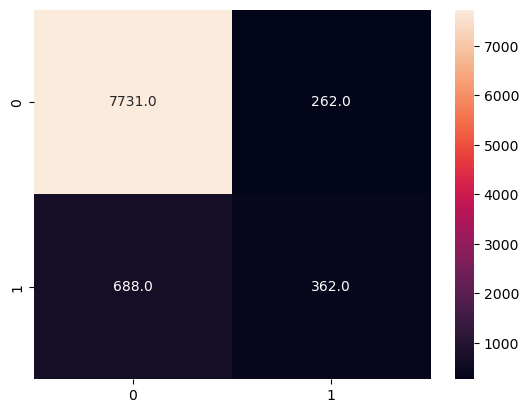

In [78]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='.1f')

#### SHAP

##### Feature Importance

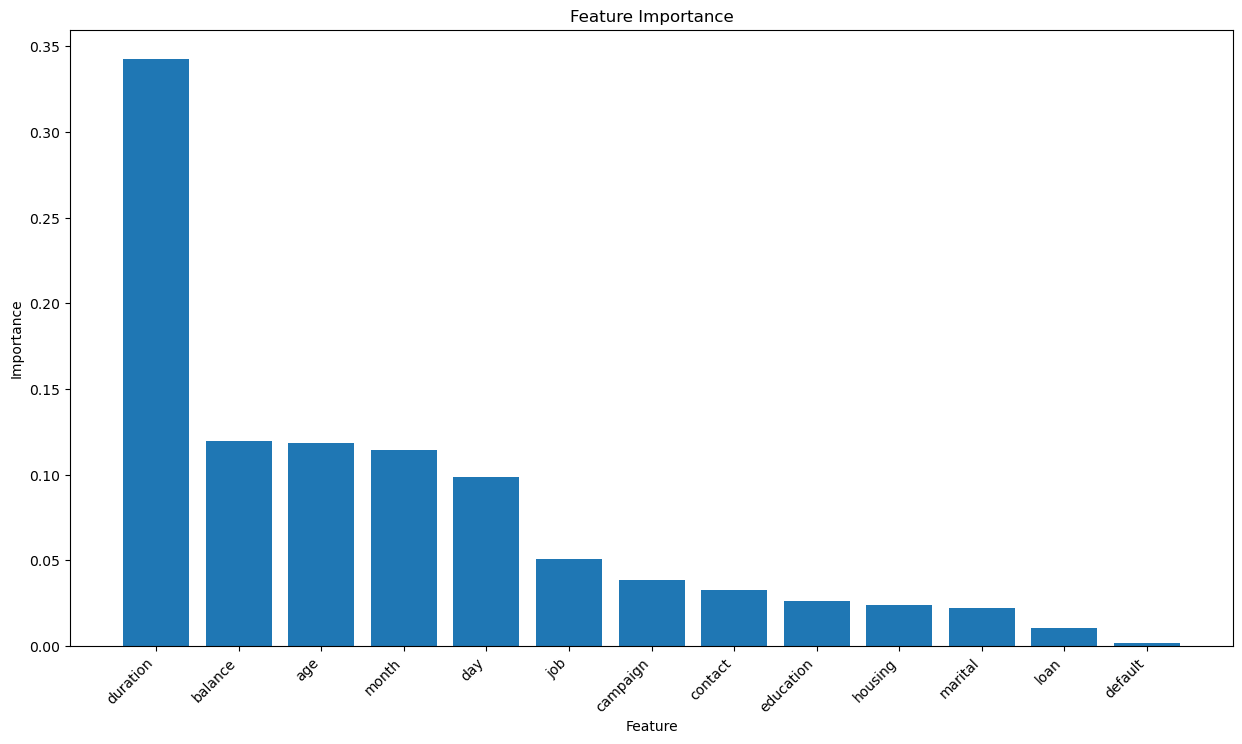

In [79]:
# Get feature importances
feature_importances = best_rf.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45, ha='right')
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

#### Saving Model Weights

In [81]:
joblib.dump(best_rf, "random_forest_model.pkl")
joblib.dump(le_y, 'target_label_encoder.pkl')

['target_label_encoder.pkl']